# **The Next Big Thing**: Forecasting Hollywood's Future with Film Analytics
Author: [Francisco de Paula Lemos](https://linkedin.com/in/chicos0)  
Language: English

## About this project

Dear PProductions Team,  

This project will be led by our Data & Analytics team at Indicium. With a wealth of experience from over 50 client engagements, we'll combine our data analysis expertise with PProduction's industry knowledge to to maximize your next film's potential for success.

We'll guide this analysis using the CRISP-DM framework, a systematic process that ensures a comprehensive approach. It begins with understanding the **Business Objectives**, moves to **Data Understanding** and **Data Preparation**, that culminates in **Data Modeling** and the delivery of a clear and compelling narrative that will maximize your next film's potential for success.



## 1 - **Business Understanding**

### 1.1 **Introduction**

Our proposal outlines a strategic project to leverage your cinematic database for a data-driven film development strategy. So, our primary goal is to provide actionable insights that will guide your next production decision beyound intuition, maximizing its potential for both **popular acclaim and financial success**. 

### 1.2 **Business Objectives**

As requested, our analysis will focus on answering a set of critical business questions, while also addressing the technical aspects of our analysis. We believe this full-circle approach will not only deliver the key business recommendations you seek but also provide a transparent view into the data science process.

#### **The Criteria for Success: A Multi-faceted Approach**

* **Audience acclaim (Q2a):** We'll dive into what film attributes drive high `IMDb_Ratings`, helping the creations of films that are not only profitable but also acclaimed by the general audience.

* **Maximizing ROI (Q2b):** We'll identify the core factors that correlate with high `Gross` revenue, providing a clear data-driven understanding of what makes a film financially successful.

#### **The Analytical & Technical Approach**

* **Exploratory Data Analysis (Q1):** We will provide a comprehensive EDA, highlighting the main characteristics and relationships between variables.

* **Future-Proofing:** To de-risk future investments, we will explore the predictive power of key variables. This analysis is a crucial step in moving beyond intuition and making data-driven decisions.

    * **Overview Column Insights (Q2c):** We will investigate whether the film's "Overview" (synopsis) contains linguistic patterns or keywords that can give us any insights about the data. Also, we'll try to predict the film's genre by the same "Overview" column.

    * **IMDB Predictive Modeling (Q3):** We will outline the methodology for predicting a film's potential IMDb score, including:
        * The **type of problem** being solved (Regression vs. Classification).
        * The **key variables** and **transformations** to be used.
        * The most suitable **models** and their respective pros and cons.
        * The **performance metrics** chosen to evaluate the model's accuracy.

By addressing all these points, we aim to provide a clear and actionable recommendation on the type of film PProductions should develop next to ensure Pproduction's next big hits.

## 2 **Data Understanding**

This section details our initial exploration of the dataset. We'll focus on the dataset's structure, quality and key characteristics to empower us with more knowledge to hypothesis formation.

* 2.1 **Initial Assessment**: We will begin by loading the raw data, importing libraries and conducting a review of its shape and columns.

* 2.2 **Quality Check**: We will identify and handle any missing, duplicated, or incorrect data entries, as well as inappropriate data types, that could impact our analysis. Additionally, we'll perform a series of data transformations to make complex categorical data more usable. This structural modeling of the data is essential for both our exploratory analysis and the predictive modeling to follow.

* 2.3 **Statistical Summary**: For numerical columns, we will generate descriptive statistics to understand their central tendency, spread, and overall distribution. For categorical columns, we'll approach with the analysis of their frequency distribution. Based on our initial findings, we will formulate preliminary guiding hypotheses about the relationships between variables.

* 2.4 **Exploratory Data Analysis**: This is where the real fun begins. We'll be creating all sorts of visuals - from **histograms** to **bar charts** and more - to truly understand how our variables are distributed and how they relate to each other. Here we will be testing the hypotheses we've formed and uncover those insights that will be the basis for our final recommendations and pave the way for the next stages of predictive modeling.


### **2.1 Initial Assessment**

#### **Importing libraries**

In [1]:
# Data handling and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from wordcloud import WordCloud

# Natural Language Processing (NLP)
import nltk
from nltk.corpus import stopwords

# Machine Learning (Scikit-learn)
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, mean_absolute_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import joblib

# Regular expressions - used in text processing
import re 

# Downloads necessary NLTK resources
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\franc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\franc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

#### **Loading dataset**

In [2]:
films = pd.read_csv("desafio_indicium_imdb.csv")
films.head()

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
4,5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"


#### **Dataset's size**

In [3]:
print(f'Films data-set has {films.shape[0]} rows and {films.shape[1]} columns.')

Films data-set has 999 rows and 16 columns.


#### **Data dictionary**

| Variable | Description |
| :--- | :--- |
| **Series_Title** | Film title |
| **Released_Year** | Release year |
| **Certificate** | Age rating |
| **Runtime** | Running time in minutes |
| **Genre** | Genre |
| **IMDB_Rating** | IMDB rating |
| **Overview** | Film synopsis |
| **Meta_score** | Weighted average of all critics' scores |
| **Director** | Director |
| **Star1** | Actor/actress #1 |
| **Star2** | Actor/actress #2 |
| **Star3** | Actor/actress #3 |
| **Star4** | Actor/actress #4 |
| **No_of_Votes** | Number of votes |
| **Gross** | Gross revenue |

### 2.2 **Quality Check**

#### **Missing values**

In [4]:
films.isnull().sum()

Unnamed: 0         0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

Our initial analysis has highlighted that `Certificate`, `Meta_score`, and `Gross` have missing values. 

We will convert `Meta_score` and `Gross` to a float data type in the next section, which allows us to natively represent missing data as `NaN` and defer handling these values for now. 

However, since `Certificate` is a categorical variable, the absence of a rating is valuable information in itself. That's why we will create a new category, 'Unrated', to fill the missing values, which will allow us to analyze whether the lack of an age rating impacts other variables.

In [5]:
films['Certificate'] = films['Certificate'].fillna('Unrated')

#### **Data type transformation**

In [6]:
films.dtypes

Unnamed: 0         int64
Series_Title      object
Released_Year     object
Certificate       object
Runtime           object
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross             object
dtype: object

Based on the analysis above we've identified several columns that require data type adjustments to ensure the integrity and usability of our dataset. Here’s how we’ll approach these transformations:

* **`Released_Year`:** This column contains year values and is intended to be a numeric type. Since our initial check indicated no missing values, we will convert the column to an **integer** type to support more efficient data storage and numerical analysis.

* **`Runtime`:** To prepare this column for analysis, we'll first remove the string suffix ('min'). As our initial assessment showed no missing values, we can then safely convert the column to an **integer** type.

* **`Gross`:** This column, representing a film's revenue, contains both commas and missing values (`NaN`). We'll first remove the commas to prepare the data for conversion. We'll then convert the column to a **float** type, which can natively handle `NaN` values, allowing us to defer imputation until the modeling phase.

In [7]:
# Trying to convert 'Released_Year' to integer
try:
    films['Released_Year'] = films['Released_Year'].astype('int64')
except ValueError:
    print("Conversion error: 'Released_Year' contains non-numeric values.")

Conversion error: 'Released_Year' contains non-numeric values.


This initial conversion attempt revealed an underlying data quality issue that needs to be addressed. Before we can successfully convert the column to an integer, we must first locate and correct the incorrect value.

In [8]:
# Converting 'Released_Year' to numeric -> setting 'coerce' will turn non-convertible values into NaN and the data type will be *float*
films['Released_Year'] = pd.to_numeric(films['Released_Year'], 'coerce')
# Finding out which films have no release year
films_with_null_year = films[films['Released_Year'].isnull()]
print(f'The film with null year is: {films_with_null_year['Series_Title']}')

The film with null year is: 965    Apollo 13
Name: Series_Title, dtype: object


Having identified '**Apollo 13**' as the only film with an incorrect entry, we've searched for the correct release year, which is '**1995**. Now we can manually correct the data.

In [9]:
films.loc[films['Series_Title'] == 'Apollo 13', 'Released_Year'] = 1995
# Checking if it was correctly replaced by '1995'
print(f"The 'Released_Year' for Apollo 13 is now: {films.loc[films['Series_Title'] == 'Apollo 13', 'Released_Year'].values[0]}")

The 'Released_Year' for Apollo 13 is now: 1995.0


In [10]:
# Converting 'Released_Year' to integer
films['Released_Year'] = films['Released_Year'].astype('int64')

In [11]:
# Converting Runtime to integer - dealing with the ' min' string
films['Runtime'] = films['Runtime'].str.replace(' min', '').astype('int64')

In [12]:
# Converting Gross to float - dealing with the comma in the numbers
films['Gross'] = films['Gross'].str.replace(',', '').astype('float64')

#### **Duplicated entries**

In [13]:
# Finding if there are any duplicated films
films["Series_Title"].duplicated().sum()

np.int64(1)

We've found a likely duplicate entry in the dataset. Let's investigate to confirm and understand what's happening.

In [14]:
# Discovering which films are duplicated
duplicated_film = films[films.duplicated(['Series_Title'], False)]['Series_Title'].unique()[0]
print(f"The duplicated film is: {duplicated_film}")

The duplicated film is: Drishyam


Now that we now that there are two films called "Drishyam", we can investigate rather they are the same film or different films with the same name.

In [15]:
# Finding out if both entries are identical
print(films.loc[films['Series_Title'] == 'Drishyam', 'Overview'])

86     A man goes to extreme lengths to save his fami...
135    Desperate measures are taken by a man who trie...
Name: Overview, dtype: object


This analysis was particularly interesting because we discovered what appeared to be a duplicate film, but in fact, we found different films sharing the same title.

#### **Data transformations**

In order to make our complex categorical data more usable for analysis, we will perform the following transformations:

* The `Genre` column, which currently holds multiple values per entry, will be split into individual columns.
* To unify the diverse rating systems found in the `Certificate` column, we will also create a `Standardized_Rating` column with four possible entrys: '**All Ages**', '**Parental Guidance**', '**Adults Only**' and '**Unrated**'.

Once these transformations are complete, we will drop the  `Genre`, `Certificate`, and `Unnamed: 0` columns, as they will serve no analytical purpose in our study.

In [16]:
# Split 'Genre' into multiple columns
genres = films['Genre'].str.split(', ', expand=True)
# Renaming process
genres.columns = [f'Genre{i+1}' for i in range(len(genres.columns))]
# Concatenating both dataframes
films = pd.concat([films, genres], axis=1)
print(f"Number of new 'Genre' columns created: {len(genres.columns)}")

Number of new 'Genre' columns created: 3


In [17]:
# Analyzing unique values in 'Certificate' column to further standardize it
print(films['Certificate'].unique())


['A' 'UA' 'U' 'PG-13' 'R' 'Unrated' 'PG' 'G' 'Passed' 'TV-14' '16' 'TV-MA'
 'GP' 'Approved' 'TV-PG' 'U/A']


In [18]:
# Defining the mapping function to convert old certificate values into new categories
def standardize_rating(certificate):
    if certificate in ['U', 'G', 'Passed', 'Approved', 'TV-PG']:
        return 'All Ages'
    elif certificate in ['PG', 'PG-13', 'UA', 'TV-14', '16', 'GP', 'U/A']:
        return 'Parental Guidance' 
    elif certificate in ['A', 'R', 'TV-MA']:
        return 'Adults Only'
    elif certificate in ['Unrated']:
        return 'Unrated'
    else:
        return 'Not classified'

# Create a 'Standardized_Rating' column
films['Standardized_Rating'] = films['Certificate'].apply(standardize_rating)

# Checking the new category distribution to confirm if the mapping worked
print(films['Standardized_Rating'].value_counts())

Standardized_Rating
Adults Only          343
All Ages             294
Parental Guidance    260
Unrated              102
Name: count, dtype: int64


In [19]:
# Droping the now unnecessary columns
films = films.drop(columns=['Genre', 'Certificate', 'Unnamed: 0'])

### 2.3 **Statistical Summary**

This section provides an overview of the dataset's key characteristics through descriptive statistics. 

By using methods like `describe()` and `value_counts()` from the pandas library, we can easily compute metrics that summarize the data's central tendencies, spread, and distribution.

* For our **numerical variables**, the analysis will give us a clear picture of the average `IMDB_Rating`, `Meta_score`, and the typical `Runtime`. We will also see the overall range of `Released_Year`, the spread of `No_of_Votes`, and the overall range of `Gross` revenue. These statistics are essential for understanding the distribution of our data, identifying potential outliers, and spotting patterns that will guide our analysis.

* For our **categorical variables**, we will focus on analyzing the frequency distribution. This will allow us to identify the most common `Director`, the prevalent `Standardized_Rating`, and the most frequent `Genre` categories. We also will analyze the frequency of our main cast members (`Star1`, `Star2`, etc.), providing valuable context on the composition of our dataset. As for the `Overview` column, a text variable, it will be analyzed separately using specific linguistic techniques.

From these initial findings we will be formulating **guiding questions** to further structure our testable hypotheses in the EDA phase.

#### **Descriptive analysis of numerical variables**

Here is a concise overview of the metrics we'll be using.

* **Mean & Standard Deviation:** The **mean** is the simple arithmetic average of a dataset. It is most useful for data that is evenly distributed. The **standard deviation (std)** complements the mean by measuring the amount of variation or dispersion in a set of values, showing how widely the data points are spread out.  

* **Extreme Values:** The **minimum (min)** and **maximum (max)** values define the full range of the dataset, indicating the lowest and highest points observed for a given variable.  

* **Quartiles (25%, 50%, 75%):** Quartiles divide a dataset into four equal parts.
    * The **First quartile** marks the point below which 25% of the data falls.
    * The **Second quartile**, also known as the **median**, is the middle value of the dataset, with 50% of the data points below it and 50% above.
    * The **Third quartile** is the value below which 75% of the data is located.

In [20]:
# Numerical variables
num_variables = ['IMDB_Rating', 'Meta_score', 'Released_Year', 'Runtime', 'No_of_Votes', 'Gross']
films[num_variables].describe().round(2)

,IMDB_Rating,Meta_score,Released_Year,Runtime,No_of_Votes,Gross
count,999.00,842.00,999.00,999.00,999.00,8.300000e+02
mean,7.95,77.97,1991.22,122.87,271621.42,6.808257e+07
std,0.27,12.38,23.30,28.10,320912.62,1.098076e+08
min,7.60,28.00,1920.00,45.00,25088.00,1.305000e+03
25%,7.70,70.00,1976.00,103.00,55471.50,3.245338e+06
50%,7.90,79.00,1999.00,119.00,138356.00,2.345744e+07
75%,8.10,87.00,2009.00,137.00,373167.50,8.087634e+07
max,9.20,100.00,2020.00,321.00,2303232.00,9.366622e+08


#### **Key Insights**

* **`IMDB_Rating`:** 
    * **Key Metrics:** The average IMDB score is **7.95**, with a median of **7.90**. The ratings range from **7.6** to **9.2**.
    * **Initial Insight:** The close proximity of the mean and median, along with a low standard deviation (**0.27**), indicates a highly consistent dataset with little dispersion. Also, the high minimum score of **7.60** confirms that our dataset is, by its very nature, a collection of films well-received by the public.
    * **Guiding Question:** Can the most prevalent `Director`s, `Genre`s, or `Star`s found in this dataset already be considered a reliable starting point for our film-making formula?  Which other factors can contribute to a high IMDB rating?
     


* **`Meta_score`:**  
    * **Key Metrics:** The average critic score is **77.97**, with a median of **79.00**. The scores range from **28.00** to a perfect **100.00**.
    * **Initial Insight:** The standard deviation of **12.38** is noticeably higher than that of `IMDB_Rating`. This, combined with a significant distance between the minimum value and the 25th percentile (**28.00** vs. **70.00**), suggests a wider range of critic opinion and the likely presence of lower-bound outliers.
    * **Guiding Question:** Could measures of a film's quality correlate to financial success?  


* **`Released_Year`:**  
    * **Key Metrics:** The dataset spans a century, from **1920** to **2020**. The median year of **1999** is the midpoint that divides the dataset in half.  
    * **Initial Insight:** The median, being closer to the maximum year than the minimum, indicates that the distribution of films is **concentrated in more recent productions**. This means that a small tail of films from 1920 to **1976** (25th percentile) is what statistically creates a left skew and pulls the mean back in time, making the median a more representative measure of a typical film's release year.  


* **`Runtime`:**  
    * **Key Metrics:** The average runtime is approximately **123 minutes**, with the median at **119 minutes**. The standard deviation is **28.10**, and the range spans from **45** to **321 minutes**.
    * **Initial Insight:** The close proximity of the mean and median suggests a fairly balanced distribution of film lengths. However, the wide range and significant standard deviation indicates a diverse dataset that includes both short and long films.
    * **Guiding Question:** Does a film's length correlate with its success? Is there an ideal runtime for a film to be both a box-office success and well-received by audiences?


* **`No_of_Votes`:**  
    * **Key Metrics:** The mean number of votes is **271,621**, while the median is **138,356**. The data is highly dispersed, with a standard deviation of over **320,000**, spanning from **25,088** to over **2.3 million** votes.
    * **Initial Insight:** The significant difference between the mean and median points to a heavily right-skewed distribution. This confirms the presence of a few extremely popular films that attract a massive number of votes, while the majority of the dataset's films have a more modest vote count.
    * **Guiding Question:** Are `No_of_Votes` and `Gross` strongly correlated? Is the number of votes merely a reflection of financial success, or does it offer insight into a different kind of success, like cultural impact, that isn't fully captured by box office revenue?


* **`Gross`:**  
    * **Key Metrics:** The mean gross revenue is **$68 million**, which is significantly higher than the median of **$23 million**. The data spans a massive range, from a minimum of **$1.3 thousand** to a maximum of **$936 million**, with a high standard deviation of **$109.8 million**.
    * **Initial Insight:** The large gap between the mean and median indicates a heavily right-skewed distribution. This confirms that while most films in the dataset generate modest revenue, a small number of blockbuster outliers inflate the average. Therefore, the median is a more representative measure of a "typical" film's revenue.
    * **Guiding Question:** What specific attributes correlate to these high-grossing outliers? Can these attributes inform a data-driven strategy for predicting a film's revenue potential?

#### **Descriptive analysis of categorical variables**

In [21]:
# Discriptive statistics for 'Director' and 'Standardized_Rating'
cat_variables = ['Director', 'Standardized_Rating']
films[cat_variables].describe().round(2)

,Director,Standardized_Rating
count,999,999
unique,548,4
top,Alfred Hitchcock,Adults Only
freq,14,343


In [22]:
# Creation of a dataframe with unification of genres
genre_long = films.melt(
    id_vars=[col for col in films.columns if col not in ['Genre1','Genre2','Genre3']],
    value_vars=['Genre1','Genre2','Genre3'],
    value_name='Genre'
)

# Creation of a dataframe with unification of stars
star_long = films.melt(
    id_vars=[col for col in films.columns if col not in ['Star1','Star2','Star3','Star4']],
    value_vars=['Star1','Star2','Star3','Star4'],
    value_name='Star'
)

# Discriptive statistics for 'Genre'
genre_long["Genre"].describe()

count      2540
unique       21
top       Drama
freq        723
Name: Genre, dtype: object

In [23]:
# Discriptive statistics for 'Star'
star_long["Star"].describe()

count               3996
unique              2707
top       Robert De Niro
freq                  17
Name: Star, dtype: object

In [24]:
# Top 5 most frequent Directors, Stars and Genres

data_to_print = {
    "Director": films["Director"].value_counts().head(5),
    "Star": star_long["Star"].value_counts().head(5),
    "Genre": genre_long["Genre"].value_counts().head(5)
}

for category, values in data_to_print.items():
    print(f"\n--- Top 5 Most Frequent {category}s ---")
    for name, count in values.items():
        print(f"{name}, Frequency: {count}")


--- Top 5 Most Frequent Directors ---
Alfred Hitchcock, Frequency: 14
Steven Spielberg, Frequency: 13
Hayao Miyazaki, Frequency: 11
Martin Scorsese, Frequency: 10
Akira Kurosawa, Frequency: 10

--- Top 5 Most Frequent Stars ---
Robert De Niro, Frequency: 17
Tom Hanks, Frequency: 14
Al Pacino, Frequency: 13
Brad Pitt, Frequency: 12
Clint Eastwood, Frequency: 12

--- Top 5 Most Frequent Genres ---
Drama, Frequency: 723
Comedy, Frequency: 233
Crime, Frequency: 209
Adventure, Frequency: 196
Action, Frequency: 189


#### **Key Insights**

* **`Standardized_Rating`:**
    * **Key Metrics:** We categorized into **4** unique ratings. The most frequent one is **'Adults Only'**, with **346** films, followed by **'All Ages'**, **'Parental Guidance'** and **Unrated**.
    * **Initial Insight:** The distribution across the three standardized categories is relatively even, with no single rating being overly dominant. Only the **Unrated** category seems to have less film, **102**. This indicates that our dataset is a good sample for exploring how different audience ratings might impact a film's success.
    * **Guiding Question:** Does a film's rating category have a significant impact on its gross revenue or audience reception?

* **`Genre`:**
    * **Key Metrics:** The dataset contains **21** unique genres. The most prevalent is **Drama**, which appears in **723** films, followed by Comedy (**233**) and Crime (**209**).
    * **Initial Insight:** The strong dominance of the **Drama** genre suggests that this is a core component of many highly-rated films in our dataset. However, the presence of other genres indicates that success is not limited to just one type of film.
    * **Guiding Question:** Is the Drama genre a leading indicator of a high IMDB rating, or is it a common element that needs to be combined with other genres to drive success?

* **`Director`:**
    * **Key Metrics:** The dataset features **548** unique directors. The most prevalent one is **Alfred Hitchcock**, with **14** films, followed closely by **Steven Spielberg** with **13**.
    * **Initial Insight:** This analysis reveals a very diverse set of filmmakers. However, it also highlights a small group of directors who are consistently associated with the high-quality films in our dataset.
    * **Guiding Question:** Does the presence of a top-tier director act as a stronger predictor of a film's success than its genre or its cast?

* **`Star`:**
    * **Key Metrics:** The dataset contains over **2,700** unique actors and actresses. The most frequently featured is **Robert De Niro**, who appears in **17** films, followed by **Tom Hanks** in **14**.
    * **Initial Insight:** The vast number of unique actors and the small number of frequently appearing ones indicate that while a few stars are consistently tied to success, there is a wide range of talent in the dataset.
    * **Guiding Question:** Does having a popular star in a film's cast have a more significant impact on its IMDB rating or gross revenue compared to the director or the genre? 

### 2.4 **Exploratory Data Analysis (EDA)**


Our EDA will be a deep dive into the dataset's characteristics, providing a visual and statistical foundation for our insights. Through this in-depth exploration, we will:

* Generate visualizations like **histograms** and **bar charts** to understand the distribution of key numerical variables, such as `IMDB_Rating`, `Meta_score` and `Gross`, which will help us identify central tendencies and outliers.

* Perform a **correlation analysis** to uncover relationships between variables that are tied to a film's financial and critical success. We will also use **bar charts** to visually explore the distribution and trends within categorical variables like "Genre" (`Genre1`, `Genre2`, `Genre3`) and `Certificate`.

This comprehensive exploration will allow us to validate our hypotheses, address core business questions, and inform the subsequent stages of the project, including our text analysis of the `Overview` column and our predictive modeling efforts.

#### **Visualization**

In [25]:
# Default hist plot style
def make_histogram(df, title_name, x_label, y_label):
    plt.figure(figsize=(15, 8))
    # Capture 'count' and 'bin_edges' from the histogram
    count , bin_edges, _ = plt.hist(df, bins=20, edgecolor="black", color="lightblue")
    # Bins positioning
    bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
    bin_labels = [str(int(label)) for label in bin_centers]
    # Inner labels - for each bin
    for n, position in zip(count, bin_centers):
        if n > 0:
            plt.text(position, n, f'{int(n)}', ha='center', va='bottom', fontsize=10)
    # Titles, outer labels and grids
    plt.xticks(bin_centers, bin_labels, rotation=45, fontsize=10)
    plt.title(title_name, fontsize=16)
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    plt.grid(axis="y", alpha=0.75)
    plt.show()

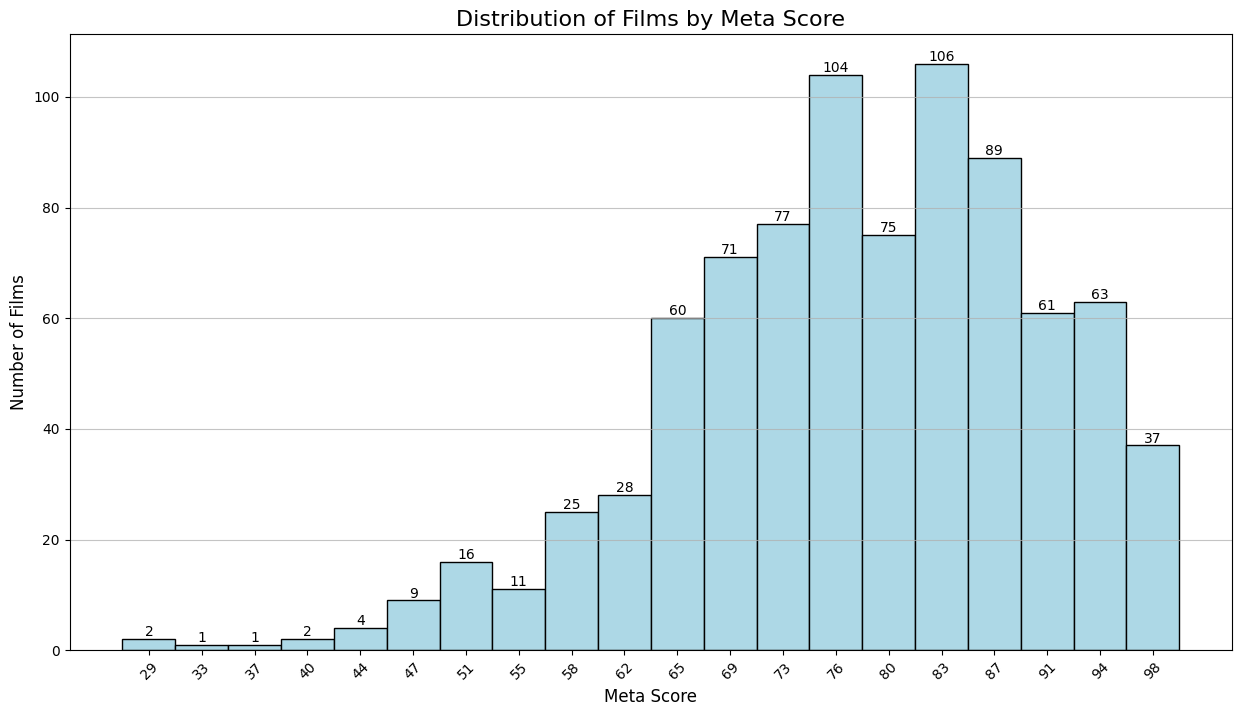

In [26]:
# Distribution of films by Meta Score
make_histogram(films["Meta_score"], "Distribution of Films by Meta Score", "Meta Score", "Number of Films")

As the descriptive statistics indicate, the histogram for the Meta_score visually confirms a high density of data with higher scores and a strong left tail, a pattern that would also appear in a box plot. This reinforces that most films in the dataset are acclaimed, but a few lower scores may be pulling the mean below the median.

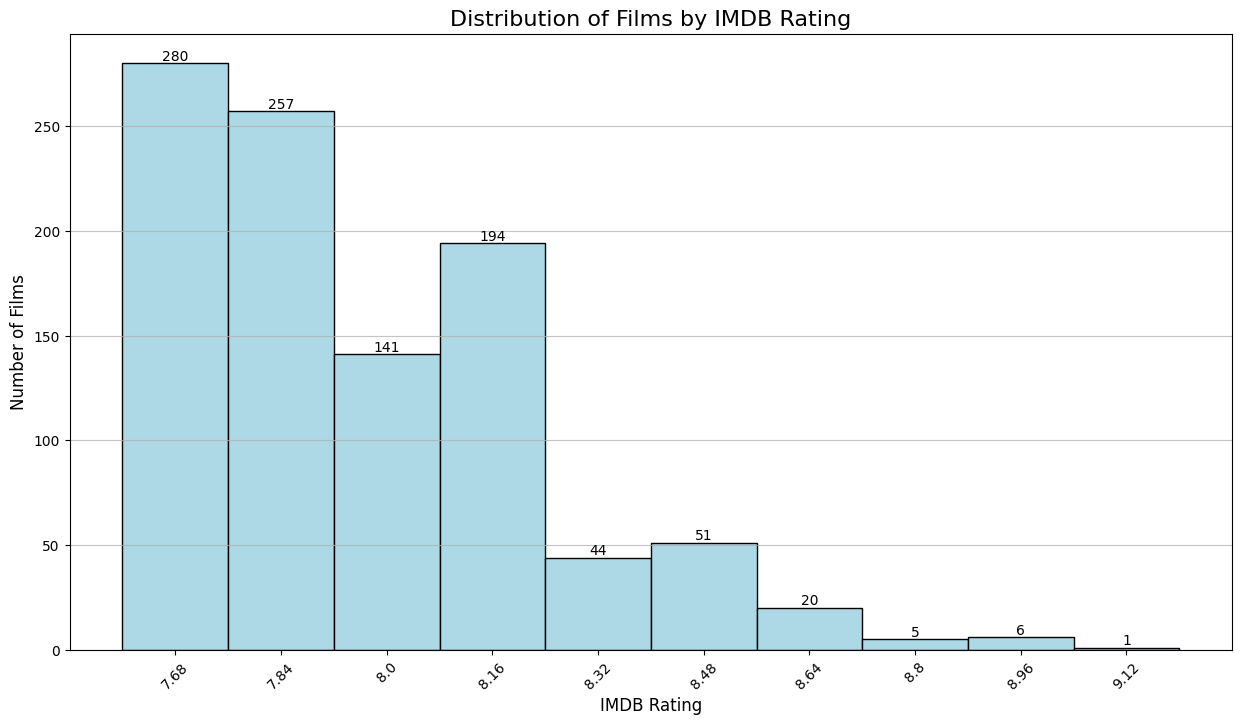

In [27]:
# Distribution of Films by IMDB Rating
plt.figure(figsize=(15, 8))
# Capture 'count' and 'bin_edges' from the histogram
count , bin_edges, _ = plt.hist(films["IMDB_Rating"], bins=10, edgecolor="black", color="lightblue")
# Bins positioning
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
bin_labels = [str(round(rating,2)) for rating in bin_centers]
# Inner labels - for each bin
for n, position in zip(count, bin_centers):
    if n > 0:
        plt.text(position, n, f'{int(n)}', ha='center', va='bottom', fontsize=10)
# Add a title, labels and grid
plt.xticks(bin_centers, bin_labels, rotation=45, fontsize=10)
plt.title("Distribution of Films by IMDB Rating", fontsize=16)
plt.xlabel("IMDB Rating", fontsize=12)
plt.ylabel("Number of Films", fontsize=12)
plt.grid(axis="y", alpha=0.75)

Consistent with earlier findings, the lowest 25th percentile of the dataset is quite homogeneous, with high density of films with similar grades. In contrast, the highest 25th percentile is more heterogeneous, containing more dispersed average ratings.

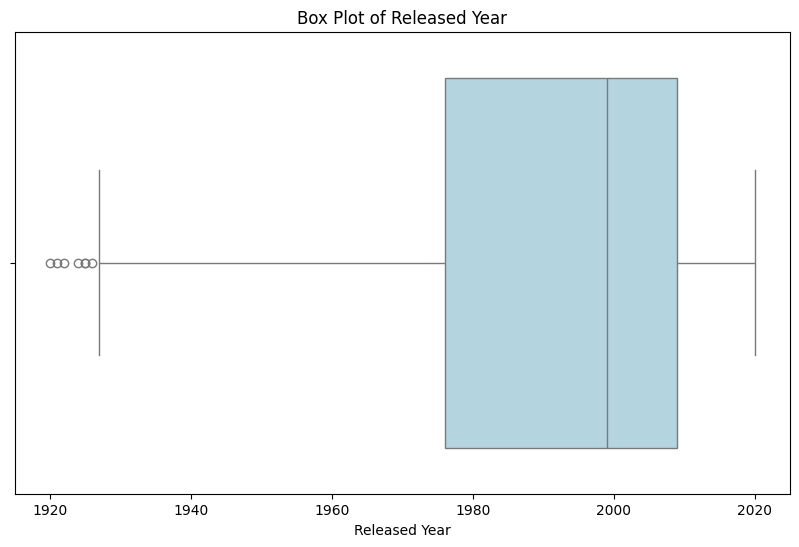

In [28]:
# Box Plot - Released Year
plt.figure(figsize=(10, 6))
sns.boxplot(x=films['Released_Year'], color = 'lightblue')
plt.title('Box Plot of Released Year')
plt.xlabel('Released Year')
plt.show()

A box plot is particularly useful for visualizing data quartiles distribution and data skew, also evidencing outliers beyond the limits of upper and lower limits. The Released Year plot shows the median is positioned towards the right side of the box, indicating a strong concentration of recent films. It also clearly reveals the presence of some outliers, which are films made in the early 20th century, falling well below the lower theoretical limit. This long tail of older data could also be clearly visible in an histogram.

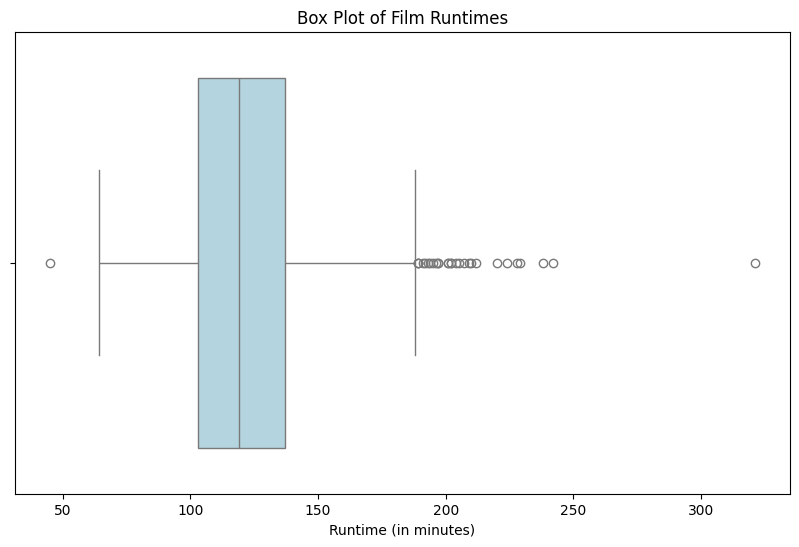

In [29]:
# Box Plot - 'Runtime'
plt.figure(figsize=(10, 6))
sns.boxplot(x=films['Runtime'], color='lightblue') 
plt.title('Box Plot of Film Runtimes')
plt.xlabel('Runtime (in minutes)')
plt.show()

The box plot for films runtime has a thin central box, which shows that the majority of films are concentrated within a typical tiny runtime range. The plot also shows numerous data points scattered well beyond the upper limit, which represent a significant number of outliers. Further we'll investigate if there is any correlation between this outliers and gross revenue.  

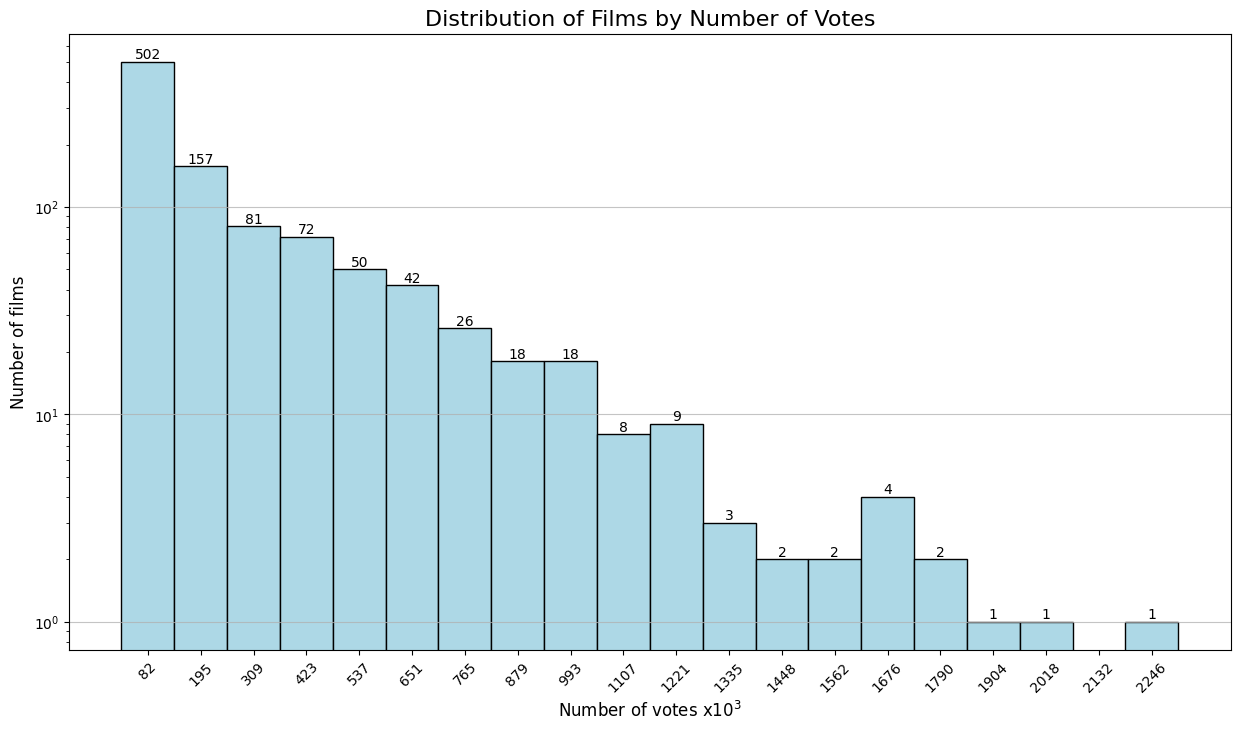

In [30]:
# Histogram of Films by Gross Revenue
plt.figure(figsize=(15, 8))
# Capture 'count' and 'bin_edges' from the histogram
count , bin_edges, _ = plt.hist(films["No_of_Votes"], bins=20, edgecolor="black", color="lightblue", log=True)
# Bins positioning
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
bin_labels = [str(int(label/1000)) for label in bin_centers]
plt.xticks(bin_centers, bin_labels, rotation=45, fontsize=10)
# Labels for each bin
for n, position in zip(count, bin_centers):
    if n > 0:
        plt.text(position, n, f'{int(n)}', ha='center', va='bottom', fontsize=10)
# Add a title, labels and grids
plt.title("Distribution of Films by Number of Votes", fontsize=16)
plt.xlabel(r'Number of votes x$10^3$', fontsize=12)
plt.ylabel("Number of films", fontsize=12)
plt.grid(axis="y", alpha=0.75)
plt.show()

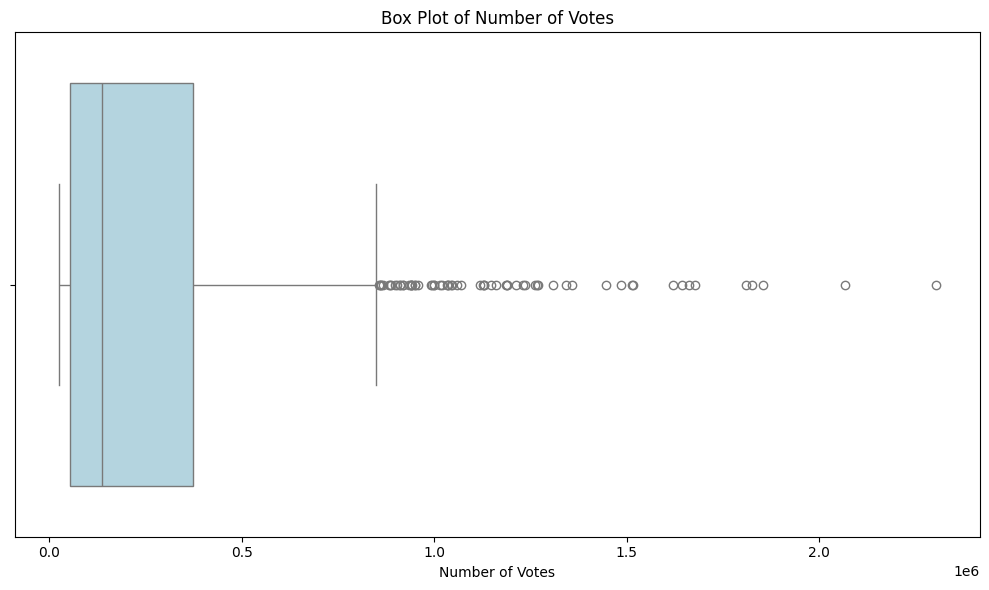

In [31]:
# Box plot - 'No_of_Votes' column
plt.figure(figsize=(10, 6))
sns.boxplot(x=films['No_of_Votes'], color='lightblue')
plt.title('Box Plot of Number of Votes')
plt.xlabel('Number of Votes')
plt.tight_layout()
plt.show()

Considering the frequency of "No_of_Votes," the data's highly skewed nature in both plots is the first major point of interest. The box plot clearly reveals a compact interquartile range with a vast number of outliers, representing a small group of films that dominate the vote count. This observation suggests that some films in the dataset have an exceptionally high number of votes, which likely correlates with wider audience reach and, consequently, higher box office success. 

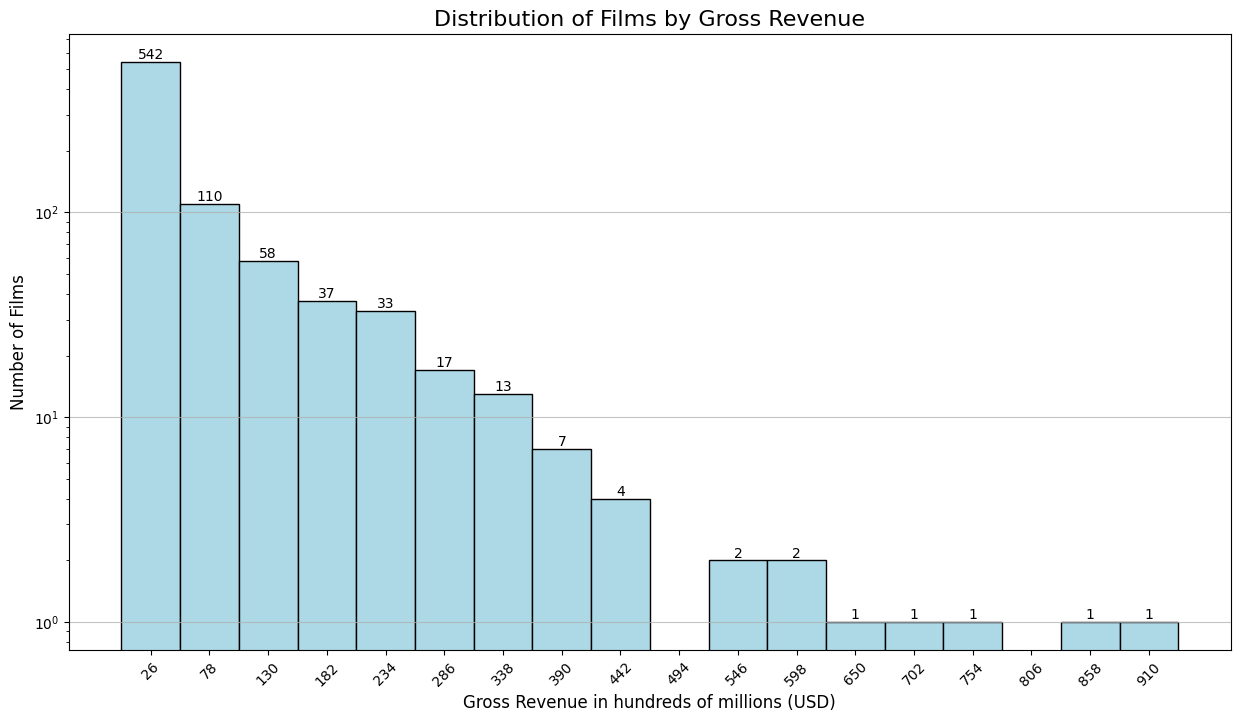

In [32]:
# Histogram of Films by Gross Revenue
plt.figure(figsize=(15, 8))
# Capture 'count' and 'bin_edges' from the histogram
count , bin_edges, _ = plt.hist(films["Gross"], bins=18, edgecolor="black", color="lightblue", log = True)
# Bins positioning
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
bin_labels = [str(int(label/1e6)) for label in bin_centers]
plt.xticks(bin_centers, bin_labels, rotation=45, fontsize=10)
# Inner labels - for each bar
for n, x_pos in zip(count, bin_centers):
    if n > 0:
        plt.text(x_pos, n, f'{int(n)}', ha='center', va='bottom', fontsize=10)
# Add a title, labels and grids
plt.title("Distribution of Films by Gross Revenue", fontsize=16)
plt.xlabel("Gross Revenue in hundreds of millions (USD)", fontsize=12)
plt.ylabel("Number of Films", fontsize=12)
plt.grid(axis="y", alpha=0.75)
plt.show()

In the Gross revenue histogram, we see that it was necessary to adjust the y-axis scale to a logarithm, due to the very expressive difference between the representativeness in size of the largest and smallest bins. In this way, the log graph continues to show the data distribution trend, but attenuating the aesthetic difference. For more precise visual values, we have the bin label above each bin. In this graph, we can see that the vast majority of films are in a more modest income range, while some outliers - blockbusters - pull the average film revenue upwards.

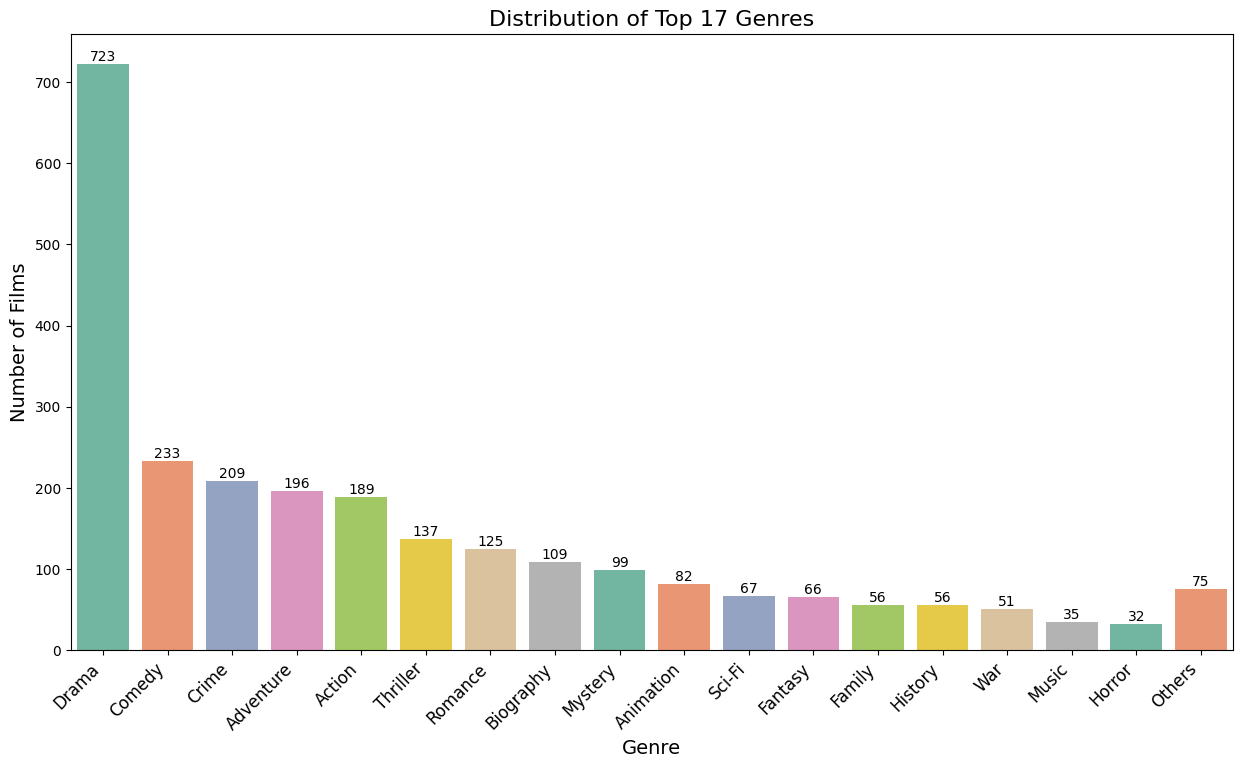

In [33]:
# Distribution of Films by Genre
# "Others" category creation for the plot
genre_counts = genre_long['Genre'].value_counts()
top_17_genres = genre_counts.head(17)
others_count = genre_counts.iloc[17:].sum()
# Create a new Series for plotting  "most Genres" with "Others"
plot_data = pd.concat([
    top_17_genres,
    pd.Series([others_count], index=['Others'])
])
# Bar-chart plot
plt.figure(figsize=(15, 8))
sns.barplot(x=plot_data.index, y=plot_data.values, hue=plot_data.index, palette='Set2')
# Inner labels - for each bin
for index, value in enumerate(plot_data.values):
    plt.text(index, value, str(int(value)), ha='center', va='bottom', fontsize=10)
# Title and outer labels
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.xlabel('Genre', size=14)
plt.ylabel('Number of Films', size=14)
plt.title('Distribution of Top 17 Genres', size=16)
plt.show()

This chart provides clear insights into the distribution of genres in the dataset. It shows which genres are the most common, allowing us to identify the most popular ones (such as Drama, Comedy, etc.) and their relative popularity. The "Others" category is particularly useful as it consolidates all low-frequency genres into a single group, confirming that the majority of films belong to a small number of dominant genres. This raises a key question: could these most prevalent genres play a big role in a film's gross revenue?

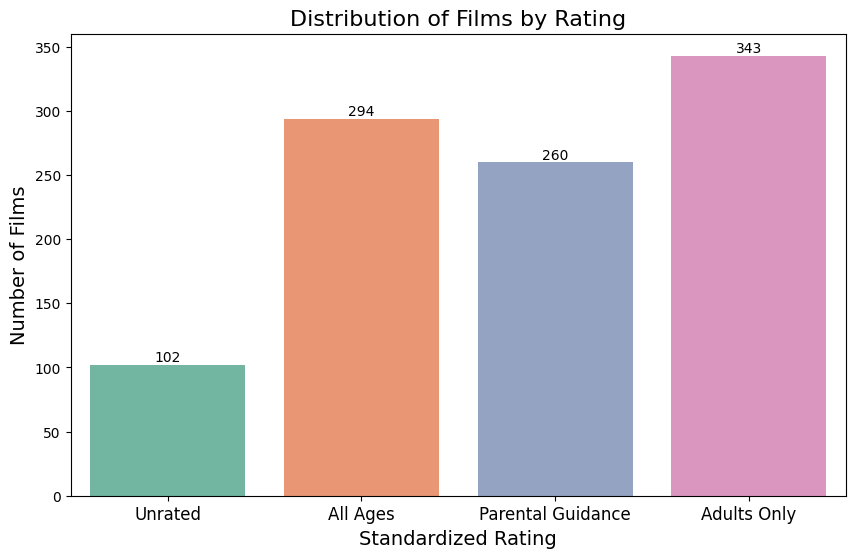

In [34]:
# 'Standardized_Rating' column counting
rating_counts = films['Standardized_Rating'].value_counts()
# Desired order of categories
desired_order = ['Unrated','All Ages', 'Parental Guidance', 'Adults Only']
ordered_counts = rating_counts.reindex(desired_order)
# Barchart plot
plt.figure(figsize=(10, 6))
sns.barplot(x=ordered_counts.index, y=ordered_counts.values, hue=ordered_counts.index, palette='Set2')
# Inner labels - for each bin
for index, value in enumerate(ordered_counts.values):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=10)
# Titles and outer labels
plt.xticks(rotation=0, ha='center', fontsize=12)
plt.xlabel('Standardized Rating', size=14)
plt.ylabel('Number of Films', size=14)
plt.title('Distribution of Films by Rating', size=16)
plt.show()

We can see that the distribution among the three main categories is similar, which opens the door to explore whether any standardized rating on its own is correlated with higher gross revenue, for example. We could also see if unrated films have any difference in gross revenue compared to the others.

### 2.4.1 **Initial Hypotheses**

To be more assertive on our analysis and try to awnser the most important questions, we will be narrowing our guiding questions into this six Hypotheses.

* A)  There are some `Genre`s in the dataset that correlate with higher `IMDB_Ratings`.

* B)  `Genre`s is a important marker that correlate with a film's `Gross` revenue potential.  

* C)  There is a direct correlation between the frequency of appearance of top-tier **Directors** or **Stars** and a film's `Gross` revenue.  

* D)  A film's **`Standardized_Rating`** has a measurable impact on its `Gross` revenue performance, with wider-audience ratings (e.g., 'All Ages' and 'Parental Guidance') correlating with higher gross revenue.  

* E)  An optimal **`Runtime`** that positively correlate with a film's audience acclaim (`IMDB_Rating`) does exist.

* F)  An optimal **`Runtime`** that positively correlate with higher film `Gross` revenue does exist.  

In [35]:
# Grouping columns by different metrics for future analysis

#IMDB grouped by Genre
imdb_gb_genre = genre_long.groupby('Genre')['IMDB_Rating'].mean().sort_values(ascending=False)
# Gross grouped by Genre
gross_gb_genre = genre_long.groupby('Genre')['Gross'].mean().sort_values(ascending=False)
# Gross grouped by Director
gross_gb_director_3films = films.groupby('Director')['Gross'].mean().sort_values(ascending=False)
# Gross grouped by Star
gross_gb_star = star_long.groupby('Star')['Gross'].mean().sort_values(ascending=False)
# Gross grouped by Stars that appeared in more than 5 films
gross_gb_star_5films = star_long.groupby('Star').filter(lambda x: len(x) > 5).groupby('Star')['Gross'].mean().sort_values(ascending=False)
# Gross grouped by Standarized Rating
gross_gb_rating = films.groupby("Standardized_Rating")["Gross"].mean().sort_values(ascending=False)
# Gross grouped by Runtime
gross_gb_runtime = films.groupby("Runtime")["Gross"].mean().sort_values(ascending=False)
# IMDB grouped by Director that appeared in more than 3 films
imdb_gb_director_3films = films.groupby("Director").filter(lambda x: len(x) > 3).groupby("Director")["IMDB_Rating"].mean().sort_values(ascending=False)
# IMDB grouped by Stars that appeared in more than 5 films 
imdb_gb_star_5films = star_long.groupby('Star').filter(lambda x: len(x) > 5).groupby('Star')['IMDB_Rating'].mean().sort_values(ascending=False)
# IMDB grouped by Runtime
imdb_gb_rating = films.groupby("Runtime")["IMDB_Rating"].mean().sort_values(ascending=False)




#### **Hypothesis A**

H0 - There are no `Genre`s in the dataset that correlate with higher `IMDB_Ratings`.  
H1 - There are some `Genre`s in the dataset that correlate with higher `IMDB_Ratings`.

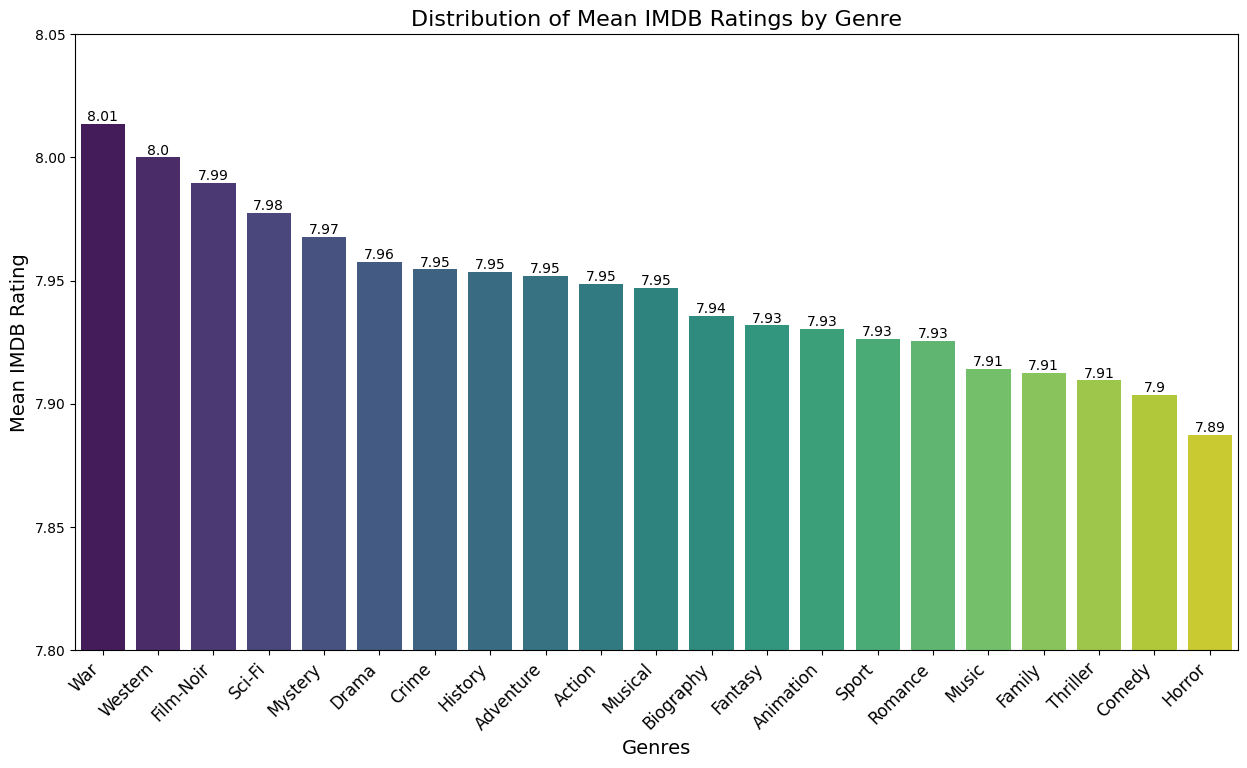

In [36]:
# Distribution of mean IMDB average grouped by Genre
plt.figure(figsize=(15, 8))
sns.barplot(x=imdb_gb_genre.index, y=imdb_gb_genre.values, hue=imdb_gb_genre.index, palette='viridis')
plt.ylim(7.80, 8.05)
# Inner labels - for each bin
for index, value in enumerate(imdb_gb_genre.values):
    plt.text(index, value, str(round(value,2)), ha='center', va='bottom', fontsize=10)
# Title and outer labels
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.xlabel('Genres', size=14)
plt.ylabel('Mean IMDB Rating', size=14)
plt.title('Distribution of Mean IMDB Ratings by Genre', size=16)
plt.show()


In [37]:
# Counting the frequency of each genre
genre_counts = genre_long['Genre'].value_counts()

# Filtering genres with 5 or more films
genres_to_analyze = genre_counts[genre_counts >= 5].index.tolist()

# Creating a list of IMDb ratings for the filtered genres
imdb_ratings_by_genre = [genre_long[genre_long['Genre'] == genre]['IMDB_Rating'] for genre in genres_to_analyze]

# Performing the ANOVA test
f_statistic, p_value = stats.f_oneway(*imdb_ratings_by_genre)

# Printing the results
print(f"F-Statistic: {f_statistic:.2f}")
print(f"P-Value: {p_value:.2f}")

F-Statistic: 1.01
P-Value: 0.45


In our analysis, we examined the IMDb ratings of several film genres to determine if there were any significant differences among them. We started by filtering the data to focus on genres with at least five films, because some genres could have lesser films than that and ANOVA wouldn't be able to infer much with such tiny samples.

Next, we used an ANOVA test to compare the average IMDb ratings of these selected genres. The test's result was a P-value of 0.45, which is higher than the standard significance level of 0.05.

This finding suggests that there is no statistically significant difference in the average IMDb ratings across the genres we analyzed. In simpler terms, the IMDb ratings for film quality do not vary much from one genre to another and the observed minor variations in ratings among genres could be attributed to statistical fluctuation rather than a true underlying difference.

#### **Hypothesis B**

H0 - `Genre`s is not a important marker that correlate with a film's `Gross` revenue potential.
H1 - `Genre`s is a important marker that correlate with a film's `Gross` revenue potential.

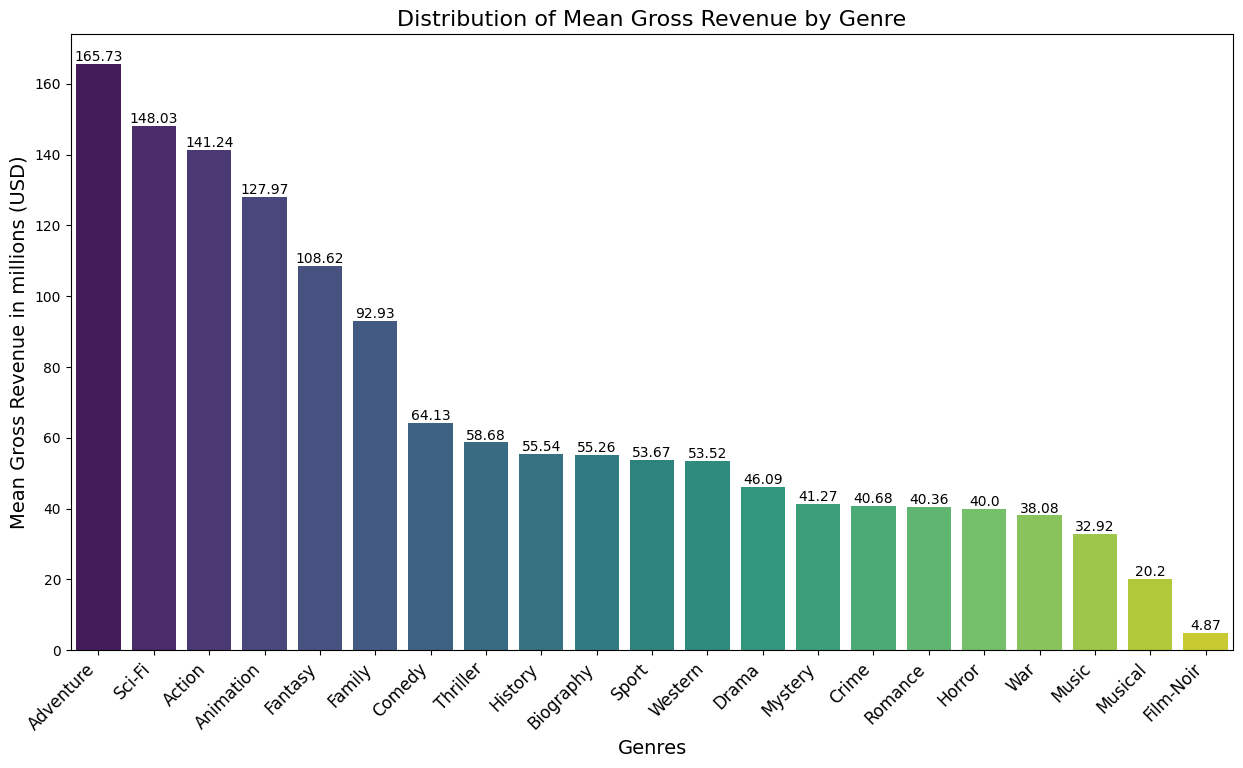

In [38]:
# Distribution of mean gross revenue by genre
plt.figure(figsize=(15, 8))
sns.barplot(x=gross_gb_genre.index, y=gross_gb_genre.values/1e6, hue=gross_gb_genre.index, palette='viridis')
# Inner labels - for each bin
for index, value in enumerate(gross_gb_genre.values):
    value = value / 1e6  
    plt.text(index, value, str(round(value,2)), ha='center', va='bottom', fontsize=10)
# Title and outer labels
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.xlabel('Genres', size=14)
plt.ylabel('Mean Gross Revenue in millions (USD)', size=14)
plt.title('Distribution of Mean Gross Revenue by Genre', size=16)
plt.show()

In [39]:
# Dropping rows with missing 'Gross' values
genre_long.dropna(subset=['Gross'], inplace=True)
# Filtering genres with at least 5 samples to avoid errors
genre_counts = genre_long['Genre'].value_counts()
genres_to_analyze = genre_counts[genre_counts >= 5].index.tolist()
# 'Gross' values grouped by genres
gross_by_genre = [genre_long[genre_long['Genre'] == genre]['Gross'] for genre in genres_to_analyze]
# ANOVA test
f_statistic, p_value = stats.f_oneway(*gross_by_genre)
# Results
print(f"F-Statistic: {f_statistic:.2f}")
print(f"P-Value: {p_value}")

F-Statistic: 17.36
P-Value: 1.9756689016660051e-56


The ANOVA test results indicate that there is a statistically significant difference in the average gross revenue among the different film genres.  

The key to this conclusion is the P-value, **extremely** close to zero, is far below the conventional significance level of 0.05.  

In simpler terms, we can reject the null hypothesis. This means that the genre of a film plays a significant role in its box office performance. The observed differences in gross revenue between genres are not due to random chance, but are instead a result of a true underlying difference. So, for a box-office succes, aiming for genres like: Adventure, Sci-Fi, Action, Animation, or Fantasy, might be a good call.

#### **Hypothesis C**

H0 - There is no direct correlation between the frequency of appearance of top-tier **Directors** or **Stars** and a film's `Gross` revenue.  
H1 - There is a direct correlation between the frequency of appearance of top-tier **Directors** or **Stars** and a film's `Gross` revenue.

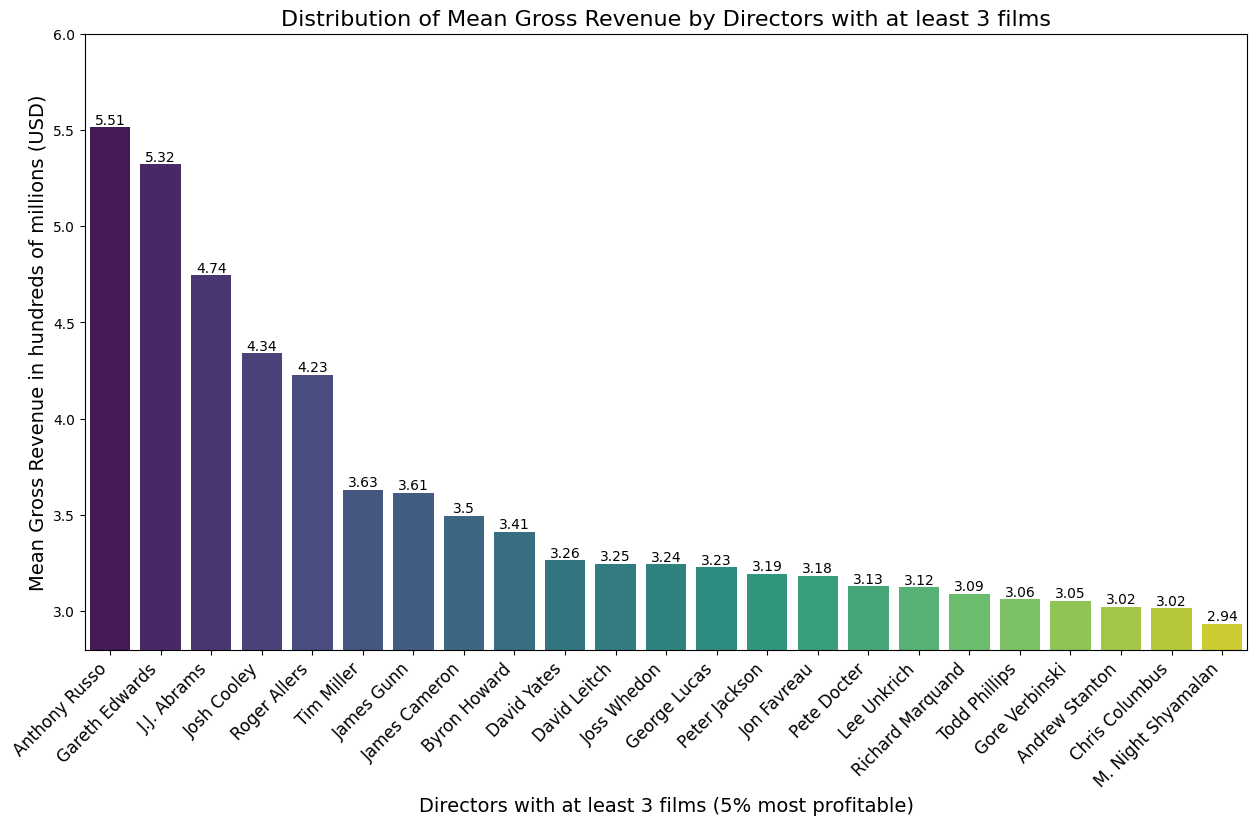

In [40]:
# Distribution of mean gross revenue by the 5% most profitable directors with at least 3 films
gross_gb_director_3films_5th = gross_gb_director_3films.head(int(0.05*len(gross_gb_director_3films.dropna())))
gross_gb_director_3films_5th.count() 
# Plot itself
plt.figure(figsize=(15, 8))
sns.barplot(x=gross_gb_director_3films_5th.index, y=gross_gb_director_3films_5th.values/1e8, hue=gross_gb_director_3films_5th.index, palette='viridis')
plt.ylim(2.8, 6)
# Inner labels - for each bin
for index, value in enumerate(gross_gb_director_3films_5th.values):
    value = value / 1e8  
    plt.text(index, value, str(round(value,2)), ha='center', va='bottom', fontsize=10)
# Title and labels
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.xlabel('Directors with at least 3 films (5% most profitable)', size=14)
plt.ylabel('Mean Gross Revenue in hundreds of millions (USD)', size=14)
plt.title('Distribution of Mean Gross Revenue by Directors with at least 3 films', size=16)
plt.show()

We chose to apply a filter for directors with at least three films and to focus on the top 5% for specific analytical reasons. This approach ensures that our analysis is based on a robust sample and that we are focusing on the true high-performers, allowing us to accurately identify and visualize the most profitable directors in the dataset.

That said, based on the chart, we can see that certain directors, like **Anthony Russo, Gareth Edwards, J.J. Abrams, Josh Cooley and Roger Allers** have an excellent average gross revenue with their films. According to the data distribution, the presence of one of these specific individuals as a film's director shows a clear correlation with a higher gross revenue and would most likely be a good fit for Pproductions next big hit.

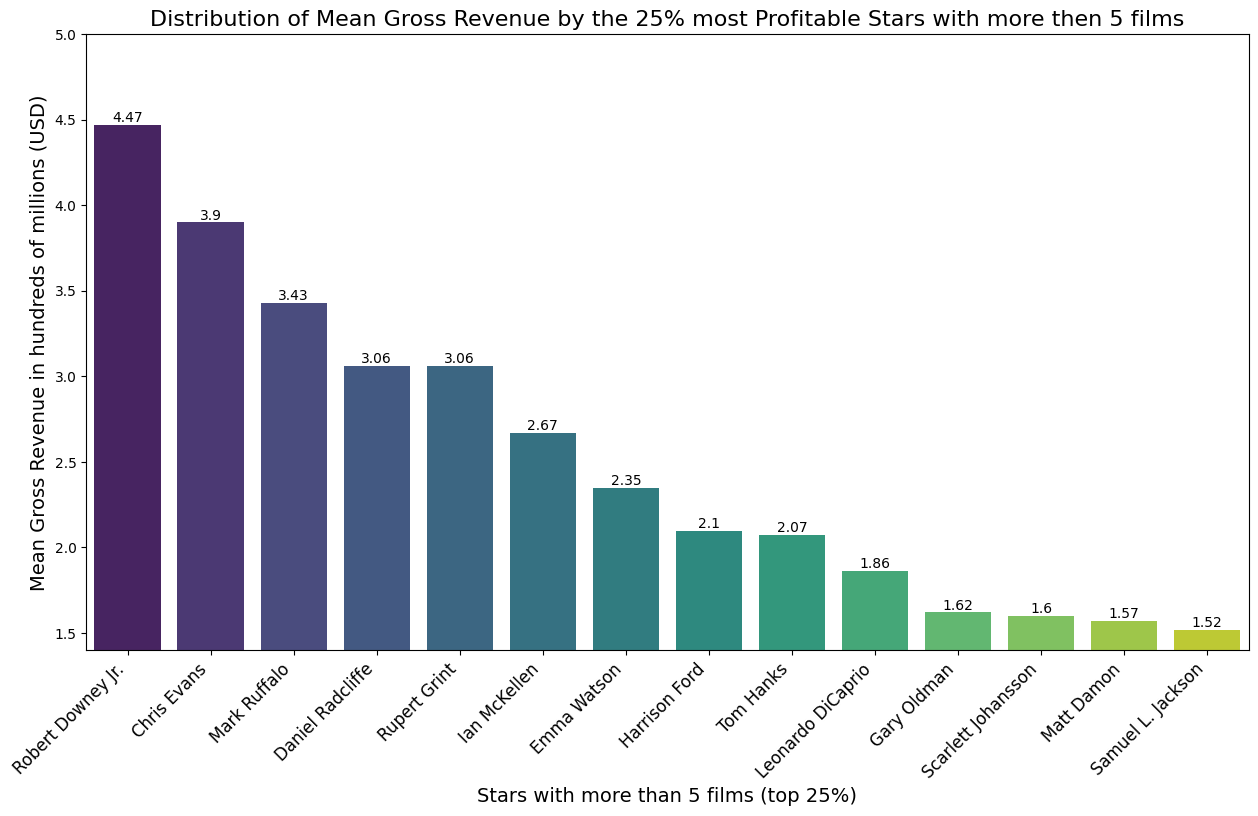

In [41]:
# Distribution of Mean Gross Revenue by the 25% most profitable stars with more than 5 films
gross_gb_star_5films_75th = gross_gb_star_5films.head(int(0.25*len(gross_gb_star_5films.dropna())))
# Plot itslef
plt.figure(figsize=(15, 8))
sns.barplot(x=gross_gb_star_5films_75th.index, y=gross_gb_star_5films_75th.values/1e8, hue=gross_gb_star_5films_75th.index, palette='viridis')
plt.ylim(1.4, 5)
# Inner labels - for each bin
for index, value in enumerate(gross_gb_star_5films_75th.values):
    value = value / 1e8  
    plt.text(index, value, str(round(value,2)), ha='center', va='bottom', fontsize=10)
# Title and labels
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.xlabel('Stars with more than 5 films (top 25%)', size=14)
plt.ylabel('Mean Gross Revenue in hundreds of millions (USD)', size=14)
plt.title('Distribution of Mean Gross Revenue by the 25% most Profitable Stars with more then 5 films', size=16)
plt.show()

With slightly changes, for better analytical reasons, we've filttered only Stars who have appeared in five or more films and are in the top 25% for mean gross revenue.

Our filtering choices, similar to the director analysis, ensure we are identifying the most commercially successful individuals based on a substantial filmography rather than one-off box office hits.

The data reveals that actors like Robert Downey Jr., Chris Evans, and Mark Ruffalo lead this group, demonstrating a strong correlation between their presence in a film and its higher average gross revenue.

Seems like Marvel's Movies formula might be a good fit.

#### **Hypothesis D**

H0 - A film's **`Standardized_Rating`** has no impact on its `Gross` revenue performance, with wider-audience ratings (e.g., 'All Ages' and 'Parental Guidance') not correlating with higher gross revenue.
H1 - A film's **`Standardized_Rating`** has a measurable impact on its `Gross` revenue performance, with wider-audience ratings (e.g., 'All Ages' and 'Parental Guidance') correlating with higher gross revenue.

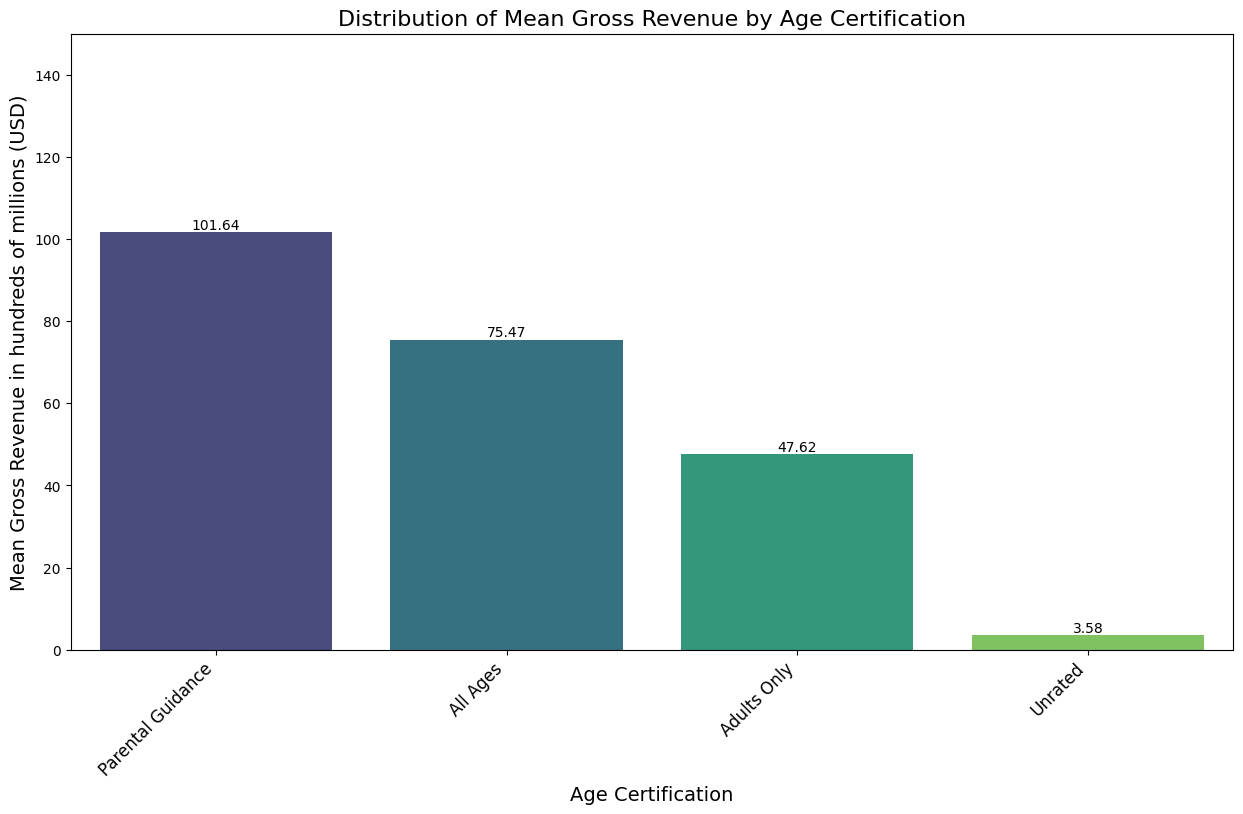

In [42]:
# Plot itself
plt.figure(figsize=(15, 8))
sns.barplot(x=gross_gb_rating.index, y=gross_gb_rating.values/1e6, hue=gross_gb_rating.index, palette='viridis')
plt.ylim(0, 150)
# Inner labels - for each bin
for index, value in enumerate(gross_gb_rating.values): 
    value = value / 1e6
    plt.text(index, value, str(round(value,2)), ha='center', va='bottom', fontsize=10)
# Title and labels
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.xlabel('Age Certification', size=14)
plt.ylabel('Mean Gross Revenue in hundreds of millions (USD)', size=14)
plt.title('Distribution of Mean Gross Revenue by Age Certification', size=16)
plt.show()

The results clearly show that a film's Standardized_Rating has a measurable impact on its Gross revenue. Films with wider audience ratings, specifically 'Parental Guidance' and 'All Ages', have a significantly higher mean gross revenue compared to those rated 'Adults Only', establishing a clear **correlation** between a more **inclusive rating** and a **film's financial performance**.

#### **Hypothesis E**

H0 - An optimal **`Runtime`** that positively correlate with a film's audience acclaim (`IMDB_Rating`) does not exist.
H1 - An optimal **`Runtime`** that positively correlate with a film's audience acclaim (`IMDB_Rating`) exist.  

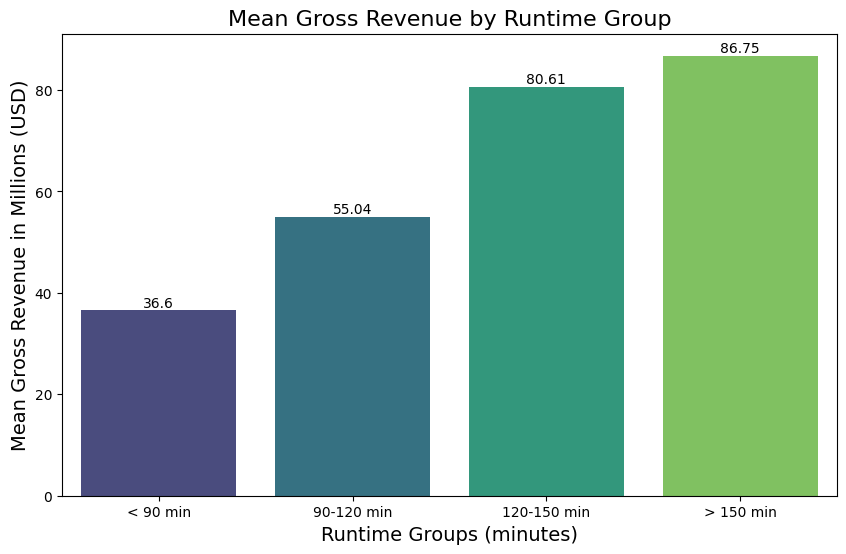

In [43]:
df_films = films.copy()
df_films.dropna(subset=['Gross'], inplace=True)
# Bins
bins = [0, 90, 120, 150, 350]
labels = ['< 90 min', '90-120 min', '120-150 min', '> 150 min']
# 'Runtime_Group' column creation
df_films['Runtime_Group'] = pd.cut(df_films['Runtime'], bins=bins, labels=labels, right=False)
# Grouping by 'Runtime_Group' and calculating the mean 'Gross'
gross_by_runtime_group = df_films.groupby('Runtime_Group', observed=False)['Gross'].mean()
# Plot itself
plt.figure(figsize=(10, 6))
sns.barplot(x=gross_by_runtime_group.index, y=gross_by_runtime_group.values/1e6, hue=gross_by_runtime_group.index, palette='viridis')
# Inner labels - for each bin
for index, value in enumerate(gross_by_runtime_group.values):
    value = value / 1e6
    plt.text(index, value, str(round(value,2)), ha='center', va='bottom', fontsize=10)
# Titles and outer labels
plt.xlabel('Runtime Groups (minutes)', size=14)
plt.ylabel('Mean Gross Revenue in Millions (USD)', size=14)
plt.title('Mean Gross Revenue by Runtime Group', size=16)
plt.show()

Based on the data, it is correct to state that there is a positive correlation between a film's runtime and its gross revenue. The analysis shows that a longer runtime, specifically for films over 150 minutes, is associated with the highest average box office performance.

An inference we can try to make here is that longer films tend to generate higher revenue, as they are often large-scale productions that attract bigger audiences. **Runtime correlates with box office success**, suggesting that the public values the **"event-film" experience**.

#### **Hypothesis F**

H0 - An optimal **`Runtime`** that positively correlate with higher film `Gross` revenue does not exist.   
H1 - An optimal **`Runtime`** that positively correlate with higher film `Gross` revenue does exists.

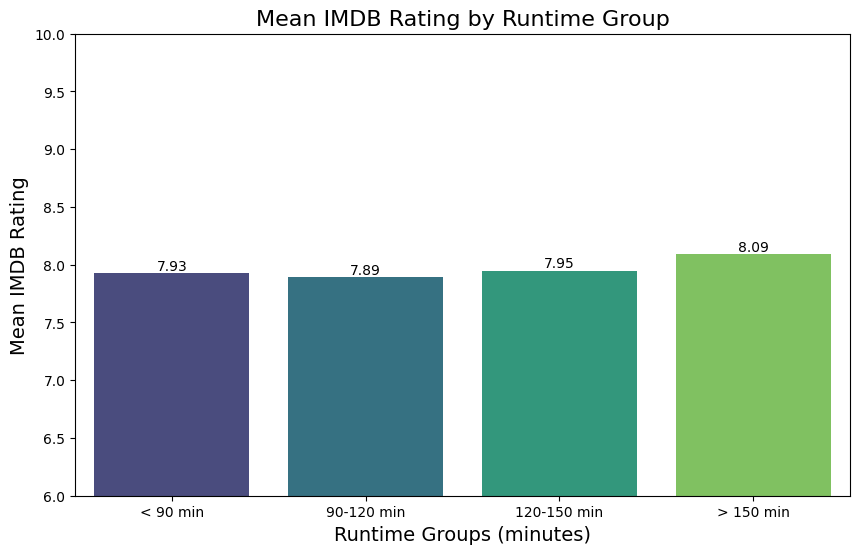

In [44]:
imdb_by_runtime_group = df_films.groupby('Runtime_Group', observed=False)['IMDB_Rating'].mean()
# Plot itself
plt.figure(figsize=(10, 6))
sns.barplot(x=imdb_by_runtime_group.index, y=imdb_by_runtime_group.values, hue=imdb_by_runtime_group.index, palette='viridis')
plt.ylim(6, 10)
# Inner labels - for the bins
for index, value in enumerate(imdb_by_runtime_group.values):
    plt.text(index, value, str(round(value, 2)), ha='center', va='bottom', fontsize=10)
# Titles and outer labels
plt.xlabel('Runtime Groups (minutes)', size=14)
plt.ylabel('Mean IMDB Rating', size=14)
plt.title('Mean IMDB Rating by Runtime Group', size=16)
plt.show()

The bar charts suggest to support the Null Hypothesis (H0), since the mean ratings are nearly the same across all runtime categories. So, there is no evidence that the film's length has a significant impact on its audience acclaim. Therefore, an "optimal" Runtime that correlates with a higher rating does not exist, and the hypothesis of a positive correlation is discarded.

#### **Overview column Insights**

Word cloud successfully saved as overview_word_cloud.png


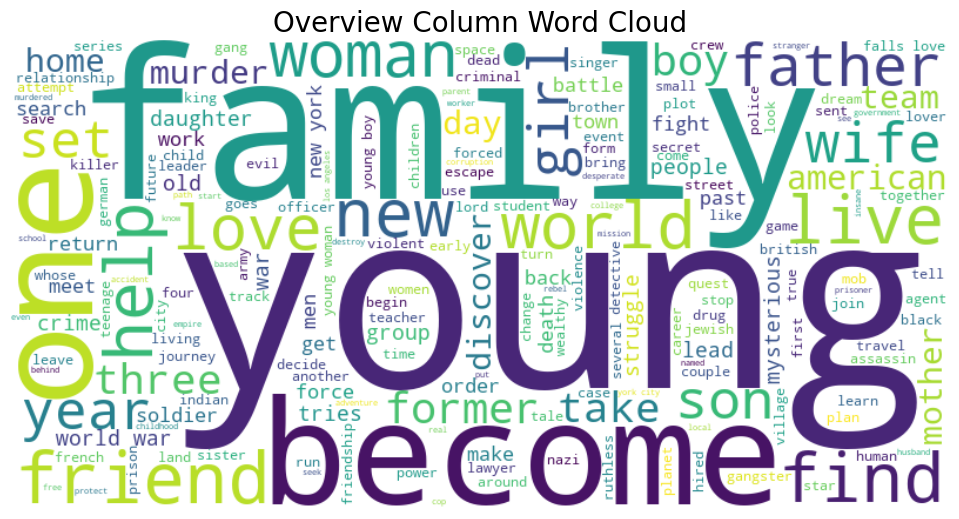

In [45]:
# Combine all text the 'Overview' column into a single string
comb_text = ' '.join(films['Overview'].dropna())

# comb_text preprocessing function
def process(comb_text):
    comb_text = comb_text.lower()
    comb_text = re.sub(r'[^\w\s]', '', comb_text)
    stop_words = set(stopwords.words('english'))
    # Custom stopwords - to not show in the cloud
    custom_stopwords = set(['film', 'story', 'movie', 'life', 'finds', 'must', 'man', 'gets', 'two'])
    all_stopwords = stop_words.union(custom_stopwords)
    tokens = [word for word in comb_text.split() if word not in all_stopwords and len(word) > 2]
    return ' '.join(tokens)

# Preprocess the text
processed_comb_text = process(comb_text)

# Generate the word cloud
wordcloud = WordCloud(
    width=800, 
    height=400, 
    background_color='white', 
    stopwords=stopwords.words('english'),
).generate(processed_comb_text)

# Plot the image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Overview Column Word Cloud', fontsize=20)
plt.tight_layout(pad=0)

# Save the image to a file
plt.savefig('overview_word_cloud.png')
print('Word cloud successfully saved as overview_word_cloud.png')

Based on the most prevalent words in the word cloud, a few connections and patterns seem to emerge. Words such as "life", "man", "story" and "family" tend to suggest that a significant portion of the films in focuses on narratives about life strugles, the human experience, personal relationships. Additionally, the presence of terms like "war", "world", "new", and "years" could indicate films with a broader scope, dealing with large-scale conflicts, major changes, and new discoveries. These finding do seem to align with genres like Drama, Crime, Adventure, Action, War, Science Fiction, which does make sense since those are some of the most prevalent genres in the dataset.

In the modeling fase we will try to inffer a film's genre by it's Overview column... we'll see how it goes.

## 3 - **Data preparation**

The Data Preparation phase of the CRISP-DM methodology is a crucial and often the most time-consuming stage of a data mining project. Its primary objective is to transform the data into a final, clean, and well-structured dataset suitable for the subsequent modeling phase. In our case, several key preparation steps have already been performed to enable a successful descriptive statistics and Exploratory Data Analysis (EDA). These include correcting data types to handle missing values, consolidating dispersed columns (such as `Genre` and `Star`) into a single one, and standardizing categorical variables into fewer, more meaningful categories (`Standardized_Rating`).

This phase would typically also involve other transformations, such as imputing missing values with a central tendency measure like the median and applying log transformations to columns with highly skewed distributions to reduce the influence of outliers. However, **we have decided to defer this step**. 

This decision is based on the implemented **pipelines** bellow, that handle this data preparation step during training. This ensures that the final model is trained on a robust and accurate dataset by preventing **data leakage**. For example, the pipeline uses `SimpleImputer` to fill missing values in the `Gross` and `Meta_score` columns with the median, but it only calculates that median on the **training data**. The same is true for the `OneHotEncoder` used for categorical variables and the `TfidfVectorizer` for text features; all of these transformations are learned exclusively from the training set, guaranteeing that the model is evaluated on data it has never seen before in a truly fair way. This controlled and automated process leads to a more reliable and reproducible machine learning model.

## 4 - **Modeling**

In this section, we will address two different problems, each from a distinct perspective.

### 4.1 **Overview Analysis** (Q2C)

In this section, the focus is on exploring the `Overview` column, which contains the film synopses. Using **Natural Language Processing (NLP)** techniques, the goal is to extract valuable insights from the text and, most importantly, to determine if it's possible to infer a film's genre from its synopsis. The analysis ranges from cleaning and tokenizing the text to creating numerical representations that will enable the identification of patterns and the construction of a predictive model for genre classification.

First, we'll start by removing rows with missing genres.
Next we'll preprocesses the movie synopses and apply it to the movie Overview.
Finally, we'll split the data into 85% for training set and 15% for validation and testing sets for model development.

In [46]:
# Attempting to run GridSearchCV to find hyperparameters
df = genre_long

# Remove rows with missing values in the 'Genre' column
df.dropna(subset=['Genre'], inplace=True)

# Text preprocessing function
def preprocess_text(text):
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    tokens = [word for word in text.split() if word not in stopwords.words('english')]
    return ' '.join(tokens)

# Apply the preprocessing function to the 'Overview' column
df['Processed_Overview'] = df['Overview'].apply(preprocess_text)

# Define the features (X) and the target (y)
X = df['Processed_Overview']
y = df['Genre']

# Split the data into 85% for training and 15% for validation and testing
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.15, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.33333, random_state=42)

Now that we have Split the datam we can set up a pipeline that combines two steps:

- TfidfVectorizer (which turns text into numerical features) 

- RandomForestClassifier (the model itself)

Then, we define a parameter grid with different values for the model's key settings.

Finally, GridSearchCV takes that pipeline and the parameter grid, then systematically tests every possible combination to find the one that yields the highest accuracy.

In [47]:
# Define the pipeline
model_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', RandomForestClassifier(class_weight='balanced', random_state=42))
])

# Define the hyperparameter grid for search
param_grid = {
    'clf__n_estimators': [100, 200, 300],
    'clf__max_depth': [None, 10, 20],
    'clf__min_samples_split': [2, 5]
}

# Configure the grid search
grid_search = GridSearchCV(model_pipeline, param_grid, cv=3, n_jobs=-1, scoring='accuracy', verbose=1)

Now, grid_search.fit() command can train the model by testing all the hyperparameter combinations defined in the param_grid above.   

After it's done, it prints the best combination found and its corresponding accuracy score.

Next, the best model from the grid search is selected and used to make predictions on the separate validation set. The accuracy_score() function then calculates how well the model performed on this new, unseen data, which gives a more realistic measure of its performance.

Finally, the best model is saved to a file (best_genre_model.pkl) so that it can be used later without needing to be retrained.

In [48]:
# Train the model with the grid search
print('Starting grid search to optimize hyperparameters...')
grid_search.fit(X_train, y_train)
print('Grid search completed.')

# Print the best hyperparameters and the best accuracy
print(f'Best hyperparameters found: {grid_search.best_params_}')
print(f'Best training accuracy: {grid_search.best_score_:.2f}')

# Evaluate the best model on the validation set
best_model = grid_search.best_estimator_
val_accuracy = accuracy_score(y_val, best_model.predict(X_val))
print(f'Accuracy of the best model on the validation set: {val_accuracy:.2f}')

# .pkl save
filename = 'best_genre_model.pkl'
joblib.dump(best_model, filename)
print(f'Best model successfully saved to {filename}')

Starting grid search to optimize hyperparameters...
Fitting 3 folds for each of 18 candidates, totalling 54 fits
Grid search completed.
Best hyperparameters found: {'clf__max_depth': None, 'clf__min_samples_split': 2, 'clf__n_estimators': 300}
Best training accuracy: 0.11
Accuracy of the best model on the validation set: 0.02
Best model successfully saved to best_genre_model.pkl


In this experiment, we attempted to build a predictive model to classify movie genres based on the Overview text of each film.

The pipeline consisted of preprocessing the text (lowercasing, removing punctuation, and eliminating stopwords), transforming the processed text into TF-IDF features, and training a Random Forest Classifier. We used GridSearchCV to tune the hyperparameters of the model and selected the best configuration based on cross-validation accuracy.

After training and validation, the model achieved an accuracy of only 11%, which is considered very low for a classification task. One possible explanation is that the dataset did not contain enough samples to capture the relationship between the words in the Overview and the corresponding genres. Movie overviews tend to contain a very large and diverse vocabulary, which makes it challenging for the model to learn consistent patterns. In cases like this, a much larger dataset would likely be required in order to compensate for the diversity of words and allow the model to generalize better.

Another take is that the model could most likely have a much better predicting power if it used other columns as well, like Director and Star.

### 4.2 **IMDB Predictor Model**: a regression problem (Q3)

Before diving into the step-by-step code, we will awnser some of your questions about the predictive modeling of the IMDb rating. The approach started by classifying the problem as a regression problem, since the objective is to predict a continuous score, given that the IMDb rating is a numerical value and not a category.

The modeling used the following variables and transformations:

* Numerical variables: Runtime, No_of_Votes, Gross, Meta_score, and Released_Year were used directly after the necessary data cleaning transformations (such as converting text format to numeric).

* Categorical variables: The columns Genre, Director, Star1, Star2, Star3, and Star4 were handled. For genre, the model considered the multiplicity of genres for a single film. The actors and the director were transformed into numerical variables by counting the number of films each actor and director appeared in.

* Text variables: The Overview column was treated as a text corpus, applying Natural Language Processing (NLP) as in the 4.1 model.

The prediction was made using a **Random Forest Regression (RandomForestRegressor)** model. This model was chosen for its ability to handle non-linear and multi-dimensional data, as well as its robustness against overfitting. However, its main disadvantage is its lower interpretability compared to simpler models like linear regression.

The model's performance was evaluated using the **Mean Squared Error (MSE)**, a performance metric for regression models that calculates the average of the squared differences between the predicted and actual values, providing a clear measure of the model's accuracy. MSE was chosen because it is a metric that **penalizes larger errors** more significantly, which is important to ensure the model does not make major prediction mistakes.

First we are going to select specific columns from the genre_long DataFrame as features (X) and the IMDB_Rating as the target variable (y). 

Then, we'll split the data into training and testing sets, and define various feature groups (numerical, categorical, and text) to be used later in the machine learning pipeline.

In [49]:
# Load the DataFrame
df = genre_long

# Select the variables
X = df[['Overview', 'Director', 'Star1', 'Star2', 'Star3', 'Star4', 'Released_Year', 'Runtime', 'No_of_Votes', 'Gross', 'Meta_score', 'Standardized_Rating']]
y = df['IMDB_Rating']

# Remove rows with missing values in the 'Overview' column
X.dropna(subset=['Overview'], inplace=True)
y = y[X.index]

# Separate data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Text preprocessing
def preprocess_text(text):
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    tokens = [word for word in text.split() if word not in stopwords.words('english')]
    return ' '.join(tokens)

# Numerical columns with missing values that need imputation
numerical_with_nans = ['Gross', 'Meta_score']
# Numerical columns without missing values
numerical_without_nans = ['Runtime', 'No_of_Votes', 'Released_Year']
# Categorical columns
categorical_features = ['Director', 'Star1', 'Star2', 'Star3', 'Star4', 'Standardized_Rating']
# Text column
text_feature = 'Overview'

C:\Users\franc\AppData\Local\Temp\ipykernel_11028\1018337403.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(subset=['Overview'], inplace=True)


Now let's create a pipeline to preprocess data (data transformations) and train a model for a regression task.

It first creates a **ColumnTransformer** to handle different types of data in the dataset:

* It uses **SimpleImputer** to fill missing values in numerical columns like `Gross` and `Meta_score` with the median.

* It applies a **OneHotEncoder** to transform categorical features like `Director` and `Star` into a numerical format, also using SimpleImputer to fill any missing values with the most frequent value.

* It uses a **TfidfVectorizer** to convert the text in the `Overview` column into a numerical representation.

All these preprocessing steps are then combined into a single Pipeline, along with a RandomForestRegressor model, which is used to predict the IMDB_Rating. This pipeline ensures that all data transformations are applied correctly and consistently before the model is trained.

In [50]:
# Create transformers for each column type
numerical_transformer_nan = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

text_transformer = Pipeline(steps=[
    ('tfidf', TfidfVectorizer(preprocessor=preprocess_text))
])

# Combine all transformers into a single preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num_nan', numerical_transformer_nan, numerical_with_nans),
        ('num_no_nan', 'passthrough', numerical_without_nans),
        ('cat', categorical_transformer, categorical_features),
        ('text', text_transformer, text_feature)
    ])

# Create the final pipeline with the preprocessor and the model
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

Finally we can use the trained model to make predictions on the test set, then evaluates the model's performance using two common metrics: Mean Absolute Error (MAE) and R-squared (R2).

The best-performing model is saved as a .pkl file for future use.

In [51]:
# Train the model
print('Starting regression model training...')
model_pipeline.fit(X_train, y_train)
print('Training completed.')

# Make predictions on the test set
y_pred = model_pipeline.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE) on the test set: {mae:.2f}')
print(f'R-squared (R2) on the test set: {r2:.2f}')

# Save the model
filename = 'imdb_rating_regressor.pkl'
joblib.dump(model_pipeline, filename)
print(f'Regression model successfully saved to {filename}')

Starting regression model training...
Training completed.
Mean Absolute Error (MAE) on the test set: 0.04
R-squared (R2) on the test set: 0.95
Regression model successfully saved to imdb_rating_regressor.pkl


The Mean Absolute Error (MAE) of 0.04 means that, on average, the model's predictions are off by only 0.04 points on a 0 to 10 scale. Such a low value suggests that the predictions are extremely close to the actual ratings.

The R-squared (R2) value of 0.95 also indicates that the model explains 95% of the variability in the IMDb ratings. R2 values close to 1.0 show that the model has very strong predictive power and that the combination of variables selected (such as directors, stars, votes, etc.) are highly effective for predicting a film's rating.

#### (Q4)
After all of that, you can test the saved model by using the code below to predict the IMDB rating for a new film:

In [52]:
# Load the model saved as .pkl
model_pipeline = joblib.load('imdb_rating_regressor.pkl')

# The dictionary needs to be converted into a DataFrame
film_data = {
    'Overview': ['Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.'],
    'Director': ['Frank Darabont'],
    'Star1': ['Tim Robbins'],
    'Star2': ['Morgan Freeman'],
    'Star3': ['Bob Gunton'],
    'Star4': ['William Sadler'],
    'Released_Year': [1994],
    'Runtime': [142],
    'No_of_Votes': [2343110],
    'Gross': ['28,341,469'],
    'Meta_score': [80.0],
    'Standardized_Rating': ['Adults Only']
}

# Create the DataFrame in the exact order of the training columns
df_new_film = pd.DataFrame(film_data)

# Process 'Gross' and 'Runtime' data to a numerical format
# The removal of commas is crucial for conversion
df_new_film['Gross'] = df_new_film['Gross'].str.replace(',', '', regex=True).astype(float)
# The 'Runtime' column is already numerical, so a direct conversion is sufficient.
df_new_film['Runtime'] = df_new_film['Runtime'].astype(int)

# Reorder the columns to ensure the order is the same as the model's training
trainning = ['Overview', 'Director', 'Star1', 'Star2', 'Star3', 'Star4', 'Released_Year', 'Runtime', 'No_of_Votes', 'Gross', 'Meta_score', 'Standardized_Rating']
df_new_film = df_new_film[trainning]

# Make the prediction
imdb_predict = model_pipeline.predict(df_new_film)

print(f"The predicted IMDb rating for 'The Shawshank Redemption' is: {imdb_predict[0]:.2f}")

The predicted IMDb rating for 'The Shawshank Redemption' is: 8.79


The prediction of 8.80 for "The Shawshank Redemption" corroborates these results, as the film's actual rating is 9.3, making it a very close and accurate prediction, especially considering the complexity of the task of predicting a film's rating.

## Hot takes

### The Ideal Film for a Broad Audience (Q2a)

If I had to recommend a film based on what the data says, I'd go with The Dark Knight (2008). Here's why:

* High IMDB Rating: It has a rating of 9.0, placing it among the highest-rated films in the dataset.

* Critically Acclaimed: With a high Meta_score of 84.0, it is critically acclaimed.

* Popular Genres: The film falls into the Action, Crime, and Drama genres, which are very popular.

* Box Office Success: It has an extremely high gross revenue of over $534 million, indicating its widespread appeal.

* Renowned Director and Cast: It was directed by Christopher Nolan, a highly respected filmmaker, and features a well-known cast.

However, since the IMDb score is based on public votes, it's a strong indicator of a film's approval by the general audience. For someone without access to the data we've analyzed here, recommending a film with the highest score, like The Godfather, would also be an excellent choice.

### Main Factors Associated with High Gross Potential (Q2b)

* Genre: A film's genre has a significant impact on its gross revenue. The statistical analysis showed that there is a statistically significant difference in average gross revenue among the different genres.

* Age Rating: Films with broader ratings, such as "All Ages," tend to have higher gross revenue. The analysis confirmed a statistically significant difference in average revenue among the different rating categories.

* Director and Stars: The presence of a certain pool of directors and stars, who appear frequently in the dataset, are positively associated with a considerably higher average gross revenue.

* Number of Votes: Even though box-office films are expected to excel in popularity, and consequently in the number of votes, it's important to note that the number of votes has a high correlation with gross revenue.

To maximize a film's earning potential, we recommend focusing on popular genres such as Adventure, Sci-Fi, Action, Animation, or Fantasy, and on films with broader age ratings. Additionally, having renowned directors like Anthony Russo, Gareth Edwards, J.J. Abrams, Josh Cooley, and Roger Allers and famous actors such as Robert Downey Jr., Chris Evans, and Mark Ruffalo would be highly beneficial.

It's also important not to underestimate a good marketing strategy, since high audience engagement—extrapolated from the number of votes in our dataset—is directly correlated with financial success.